In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/YOLO_Augmentation/aga.zip'

extract_path = '/content/drive/MyDrive/YOLO_Augmentation'

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Файлы разархивированы в {extract_path}")

Файлы разархивированы в /content/drive/MyDrive/YOLO_Augmentation


[0 0 0]
394493670


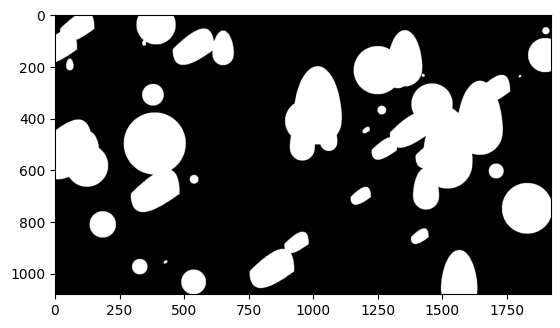

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/YOLO_Augmentation/SBER/mask/100_1710813452_0.png')
print(image[0][0])
print(image.sum())
plt.imshow(image)
plt.show()

In [ ]:
import os
from PIL import Image

def is_black_only(image_path):
    image = Image.open(image_path)
    pixels = image.load()
    width, height = image.size

    for y in range(height):
        for x in range(width):
            if pixels[x, y] != (0, 0, 0):  # Проверяем, что пиксель черный
                return False
    return True

def count_images(mask_folder):
    black_only_count = 0
    other_colors_count = 0

    for filename in os.listdir(mask_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(mask_folder, filename)
            if is_black_only(image_path):
                black_only_count += 1
            else:
                other_colors_count += 1

    return black_only_count, other_colors_count

mask_folder = '/content/drive/MyDrive/YOLO_Augmentation/SBER/mask'

black_only_count, other_colors_count = count_images(mask_folder)

print(f"Количество чистых изображений: {black_only_count}")
print(f"Количество изображений с грязью: {other_colors_count}")

Количество чистых изображений: 163
Количество изображений с грязью: 234


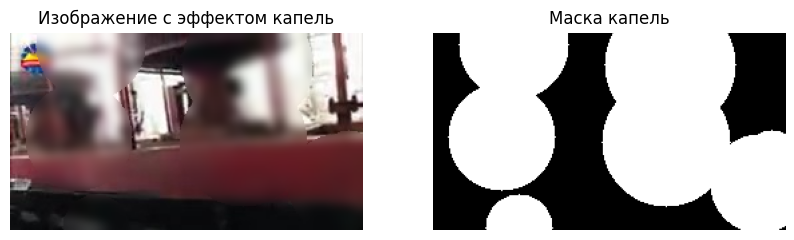

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def add_blur_drops(image_path, min_drops=5, max_drops=20, min_drop_size=10, max_drop_size=50, blur_size=15):
    image = cv2.imread(image_path)
    if image is None:
        print("Не удалось загрузить изображение.")
        return

    num_drops = random.randint(min_drops, max_drops)

    result = image.copy()

    mask = np.zeros_like(image)

    for _ in range(num_drops):
        x = random.randint(0, image.shape[1])
        y = random.randint(0, image.shape[0])

        drop_size = random.randint(min_drop_size, max_drop_size)

        cv2.circle(mask, (x, y), drop_size, (255, 255, 255), -1)

        blurred_region = cv2.GaussianBlur(image, (blur_size, blur_size), 0)
        mask_normalized = mask / 255.0
        result = result * (1 - mask_normalized) + blurred_region * mask_normalized

    result = np.clip(result, 0, 255).astype(np.uint8)

    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    mask = np.clip(mask, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Изображение с эффектом капель')
    plt.imshow(result_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Маска капель')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()

add_blur_drops('/content/drive/MyDrive/YOLO_Augmentation/aug/img/010.jpg', min_drops=5, max_drops=20, min_drop_size=10, max_drop_size=50, blur_size=21)


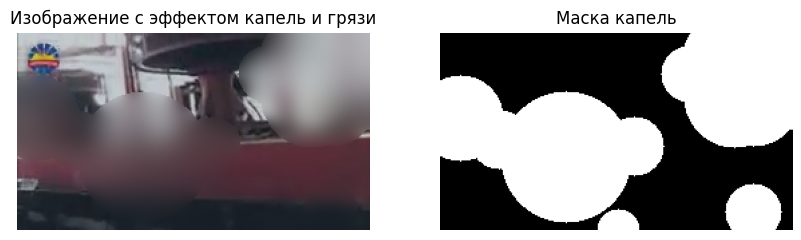

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def add_dirt_and_blur(image_path, min_drops=5, max_drops=20, min_drop_size=10, max_drop_size=50, blur_size=15, dirt_color=(100, 80, 60), dirt_alpha=0.5):
    # Загрузка изображения
    image = cv2.imread(image_path)
    if image is None:
        print("Не удалось загрузить изображение.")
        return

    num_drops = random.randint(min_drops, max_drops)

    result = image.copy()

    dirt = np.full_like(image, dirt_color, dtype=np.uint8)
    result = cv2.addWeighted(result.astype(np.uint8), 1 - dirt_alpha, dirt.astype(np.uint8), dirt_alpha, 0)

    mask = np.zeros_like(image)

    for _ in range(num_drops):
        x = random.randint(0, image.shape[1])
        y = random.randint(0, image.shape[0])

        drop_size = random.randint(min_drop_size, max_drop_size)

        cv2.circle(mask, (x, y), drop_size, (255, 255, 255), -1)

        blurred_region = cv2.GaussianBlur(result, (blur_size, blur_size), 0)
        mask_normalized = mask / 255.0
        result = result * (1 - mask_normalized) + blurred_region * mask_normalized

    result = np.clip(result, 0, 255).astype(np.uint8)

    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    mask = np.clip(mask, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Изображение с эффектом капель и грязи')
    plt.imshow(result_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Маска капель')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()

add_dirt_and_blur('/content/drive/MyDrive/YOLO_Augmentation/aug/img/010.jpg', min_drops=5, max_drops=20, min_drop_size=10, max_drop_size=50, blur_size=21, dirt_color=(100, 80, 60), dirt_alpha=0.3)


In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os

def add_blur_drops(image, num_drops=10, drop_size=20, blur_size=15):
    # Создание копии изображения для наложения эффекта
    result = image.copy()

    # Создание пустой маски для капель
    mask = np.zeros_like(image)

    for _ in range(num_drops):
        # Случайное расположение капли
        x = random.randint(0, image.shape[1])
        y = random.randint(0, image.shape[0])

        # Случайный размер капли
        drop_size = random.randint(10, 50)

        # Добавление капли в маску
        cv2.circle(mask, (x, y), drop_size, (255, 255, 255), -1)

        # Применение блюра к области капли
        blurred_region = cv2.GaussianBlur(image, (blur_size, blur_size), 0)
        mask_normalized = mask / 255.0
        result = result * (1 - mask_normalized) + blurred_region * mask_normalized

    return result, mask

def add_dirt_and_blur(image, dirt_color=(100, 80, 60), dirt_alpha=0.5):
    # Добавление серо-коричневой полупрозрачной грязи
    dirt = np.full_like(image, dirt_color, dtype=np.uint8)
    result = cv2.addWeighted(image.astype(np.uint8), 1 - dirt_alpha, dirt.astype(np.uint8), dirt_alpha, 0)

    return result

def process_images(img_folder, mask_folder, probability=0.7):
    # Получение списка изображений
    image_files = [f for f in os.listdir(img_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files:
        # Загрузка изображения
        image_path = os.path.join(img_folder, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Не удалось загрузить изображение: {image_path}")
            continue

        # Создание черной маски
        mask = np.zeros_like(image)
        mask_path = os.path.join(mask_folder, image_file)
        cv2.imwrite(mask_path, mask)

        # С вероятностью 0.7 добавляем капли и грязь
        if random.random() < probability:
            # Добавление капель
            result, drop_mask = add_blur_drops(image)

            # Добавление грязи
            result = add_dirt_and_blur(result)

            # Сохранение результата
            output_image_path = os.path.join(img_folder, f"shum_{image_file}")
            cv2.imwrite(output_image_path, result)

            # Сохранение маски капель
            output_mask_path = os.path.join(mask_folder, f"shum_{image_file}")
            cv2.imwrite(output_mask_path, drop_mask)

# Пример использования
img_folder = '/content/drive/MyDrive/YOLO_Augmentation/aug/img'
mask_folder = '/content/drive/MyDrive/YOLO_Augmentation/aug/mask'

process_images(img_folder, mask_folder, probability=0.7)

In [ ]:
import os
from PIL import Image

def is_black_only(image_path):
    image = Image.open(image_path)
    pixels = image.load()
    width, height = image.size

    for y in range(height):
        for x in range(width):
            if pixels[x, y] != (0, 0, 0):  # Проверяем, что пиксель черный
                return False
    return True

def count_images(mask_folder):
    black_only_count = 0
    other_colors_count = 0

    for filename in os.listdir(mask_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(mask_folder, filename)
            if is_black_only(image_path):
                black_only_count += 1
            else:
                other_colors_count += 1

    return black_only_count, other_colors_count

# Путь к папке с масками
mask_folder = '/content/drive/MyDrive/YOLO_Augmentation/aug/mask'

# Подсчет количества изображений
black_only_count, other_colors_count = count_images(mask_folder)

print(f"Количество чистых изображений: {black_only_count}")
print(f"Количество изображений с грязью: {other_colors_count}")

Количество чистых изображений: 0
Количество изображений с грязью: 208


In [ ]:
import os

# Пути к папкам
img_folder = '/content/drive/MyDrive/YOLO_Augmentation/aug/img'
mask_folder = '/content/drive/MyDrive/YOLO_Augmentation/aug/mask'

# Получаем списки файлов в каждой папке
img_files = set(os.listdir(img_folder))
mask_files = set(os.listdir(mask_folder))

# Находим файлы, которые присутствуют только в одной папке
files_to_delete_in_img = img_files - mask_files
files_to_delete_in_mask = mask_files - img_files

# Удаляем файлы, которые присутствуют только в одной папке
for file in files_to_delete_in_img:
    file_path = os.path.join(img_folder, file)
    os.remove(file_path)
    print(f"Deleted: {file_path}")

for file in files_to_delete_in_mask:
    file_path = os.path.join(mask_folder, file)
    os.remove(file_path)
    print(f"Deleted: {file_path}")

Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/xaxaa1.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/57.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/24.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/aerhaerhn.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/42.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/8888.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/25.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/32.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/a33.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/helpme6.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/safewq23.png
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/helpme5.jpg
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/563j6j563n.png
Deleted: /content/drive/MyDrive/YOLO_Augmentation/aug/img/dwsv23e434v.png
Deleted: /content/drive/MyDrive/YOLO_Augmen